# 誤用を避けるための注意

* 黒木玄
* 2022-07-01～2022-07-01

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\se{\op{se}}
\newcommand\sehat{\widehat{\se}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\Student{\op{Student}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
\newcommand\nuhat{\hat\nu}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データ全体の様子を適切なグラフ作画によって確認せよ！" data-toc-modified-id="データ全体の様子を適切なグラフ作画によって確認せよ！-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データ全体の様子を適切なグラフ作画によって確認せよ！</a></span><ul class="toc-item"><li><span><a href="#Anscombeの例" data-toc-modified-id="Anscombeの例-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anscombeの例</a></span></li><li><span><a href="#問題:-Anscombeの例" data-toc-modified-id="問題:-Anscombeの例-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>問題: Anscombeの例</a></span></li><li><span><a href="#データサウルス" data-toc-modified-id="データサウルス-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>データサウルス</a></span></li><li><span><a href="#問題:-データサウルス" data-toc-modified-id="問題:-データサウルス-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: データサウルス</a></span></li><li><span><a href="#箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること" data-toc-modified-id="箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること</a></span></li><li><span><a href="#不適切な箱ひげ図の例" data-toc-modified-id="不適切な箱ひげ図の例-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>不適切な箱ひげ図の例</a></span></li><li><span><a href="#箱ひげ図などの正しい使い方" data-toc-modified-id="箱ひげ図などの正しい使い方-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>箱ひげ図などの正しい使い方</a></span></li><li><span><a href="#ゴリラ" data-toc-modified-id="ゴリラ-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>ゴリラ</a></span></li><li><span><a href="#問題:-ゴリラ" data-toc-modified-id="問題:-ゴリラ-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>問題: ゴリラ</a></span></li></ul></li><li><span><a href="#印象操作のためにグラフを利用しない" data-toc-modified-id="印象操作のためにグラフを利用しない-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>印象操作のためにグラフを利用しない</a></span><ul class="toc-item"><li><span><a href="#3次元円グラフは絶対に避ける" data-toc-modified-id="3次元円グラフは絶対に避ける-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>3次元円グラフは絶対に避ける</a></span></li></ul></li><li><span><a href="#無作為抽出の失敗に注意を払う" data-toc-modified-id="無作為抽出の失敗に注意を払う-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>無作為抽出の失敗に注意を払う</a></span><ul class="toc-item"><li><span><a href="#1936年のアメリカ大統領選挙の結果の予想の失敗" data-toc-modified-id="1936年のアメリカ大統領選挙の結果の予想の失敗-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1936年のアメリカ大統領選挙の結果の予想の失敗</a></span></li><li><span><a href="#1948年のアメリカ大統領選挙の結果の予想の失敗" data-toc-modified-id="1948年のアメリカ大統領選挙の結果の予想の失敗-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>1948年のアメリカ大統領選挙の結果の予想の失敗</a></span></li></ul></li><li><span><a href="#統計モデルと調査実験観察の不整合性を無くす" data-toc-modified-id="統計モデルと調査実験観察の不整合性を無くす-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>統計モデルと調査実験観察の不整合性を無くす</a></span><ul class="toc-item"><li><span><a href="#多段階検定は避ける" data-toc-modified-id="多段階検定は避ける-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>多段階検定は避ける</a></span></li><li><span><a href="#モデルが不適切なせいでP値の値が歪むことがある" data-toc-modified-id="モデルが不適切なせいでP値の値が歪むことがある-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>モデルが不適切なせいでP値の値が歪むことがある</a></span></li></ul></li><li><span><a href="#交絡の問題に注意する" data-toc-modified-id="交絡の問題に注意する-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>交絡の問題に注意する</a></span></li><li><span><a href="#統計学用語の「誤用」には寛容であるべき" data-toc-modified-id="統計学用語の「誤用」には寛容であるべき-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>統計学用語の「誤用」には寛容であるべき</a></span><ul class="toc-item"><li><span><a href="#標本数" data-toc-modified-id="標本数-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>標本数</a></span></li><li><span><a href="#母数" data-toc-modified-id="母数-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>母数</a></span></li></ul></li><li><span><a href="#概念そのものの誤解には厳しくあるべき" data-toc-modified-id="概念そのものの誤解には厳しくあるべき-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>概念そのものの誤解には厳しくあるべき</a></span><ul class="toc-item"><li><span><a href="#P値" data-toc-modified-id="P値-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>P値</a></span></li><li><span><a href="#信頼区間と検定の表裏一体性" data-toc-modified-id="信頼区間と検定の表裏一体性-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>信頼区間と検定の表裏一体性</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

In [4]:
function plot_ols(x, y;
        ms=4, lw=1.5, alpha=0.8, xguide="", yguide="",
        xlim=nothing, ylim=nothing, kwargs...)
    X = x .^ (0:1)'
    α̂, β̂ = X \ y
    
    if isnothing(xlim)
        a, b = extrema(x)
        xlim = (a - 0.1(b-a), b + 0.1(b-a))
    end
    if isnothing(ylim)
        c, d = extrema(y)
        ylim = (a - 0.1(d-c), b + 0.1(d-c))
    end
    
    scatter(x, y; label="", msw=0, ms, alpha)
    plot!(x -> α̂ + β̂*x, xlim...; label="", lw)
    plot!(; xguide, yguide, xlim, ylim)
    plot!(; kwargs...)
end

plot_ols (generic function with 1 method)

In [5]:
using RDatasets
anscombe = dataset("datasets", "anscombe")
xlim, ylim = (3, 20), (2, 14)
xguide, yguide = "x", "y"
PP = []
for i in 1:4
    x, y = anscombe[!, "X$i"], anscombe[!, "Y$i"]
    P = plot_ols(x, y; xguide, yguide, xlim, ylim, title="Ansbombe $i")
    push!(PP, P)
end
Anscombe_quartet = plot(PP...; size=(500, 450));

In [6]:
# Rの側にdatasauRusパッケージをインストールしておくこと
datasaurus = rcopy(R"datasauRus::datasaurus_dozen")
datanames = unique(datasaurus.dataset)
xlim = ylim = (-5, 105)
xguide = yguide = ""
PP = []
for name in datanames
    x = datasaurus.x[datasaurus.dataset .== name]
    y = datasaurus.y[datasaurus.dataset .== name]
    P = plot_ols(x, y; xlim, ylim, title=name, ms=3)
    push!(PP, P)
end
layout = @layout[_ a _; b c d; e f g; h i j; k l m]
Datasaurus_dozen = plot(PP...; layout, size=(800, 1000));

## データ全体の様子を適切なグラフ作画によって確認せよ！

### Anscombeの例

[Anscombeの例](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)については

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

の必修問題を参照せよ.

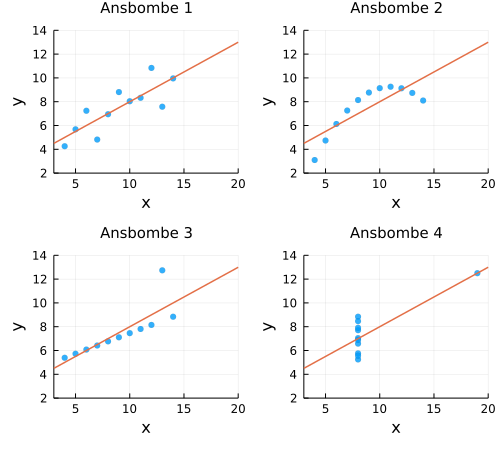

In [7]:
Anscombe_quartet

4つのデータの標本平均 $\xbar$, $\ybar$ と不偏分散 $s_x^2$, $s_y^2$ と不偏共分散 $s_{xy}$ はほぼ一致し, その結果, 回帰直線 $y = \hat\alpha + \hat\beta x$ もほぼ一致する.

このようなデータの場合にコンピュータで回帰直線だけを計算してしまうと, 不適切な回帰分析をしてしまう可能性がある. 

最小二乗法によって回帰直線を求めることが適切なのはAnscombe 1の形のデータだけである.

現実世界で得られるリアルなデータでも, Anscombe 2, 3, 4 のような様子をしている場合がある.

Anscombe 2は直線で近似するには適さない場合である.

何らかの事故によって一度だけ測定ミスが起こるとAnscombe 3のようなデータができあがる.

特別に大きな $x$ の値を持つものが1つだけ含まれているデータはAnscombe 4に似た形になる.

これらのデータは平均, 分散, 共分散のような要約統計量だけを見ても区別をできない.

### 問題: Anscombeの例

[「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb) にあるAnscombeの例に関する必修問題をまだ解いていない人は解いてみよ.

### データサウルス

データサウルスの例については

* [「条件付き確率分布, 尤度, 推定, 記述統計」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/06%20Conditional%20distribution%2C%20likelihood%2C%20estimation%2C%20and%20summary.ipynb)

の最後の方の問題で紹介した.  データサウルスについては

* https://www.autodesk.com/research/publications/same-stats-different-graphs

に英語による詳しい説明があり, 

* https://visualizing.jp/the-datasaurus-dozen/

に日本語による簡単な解説がある.

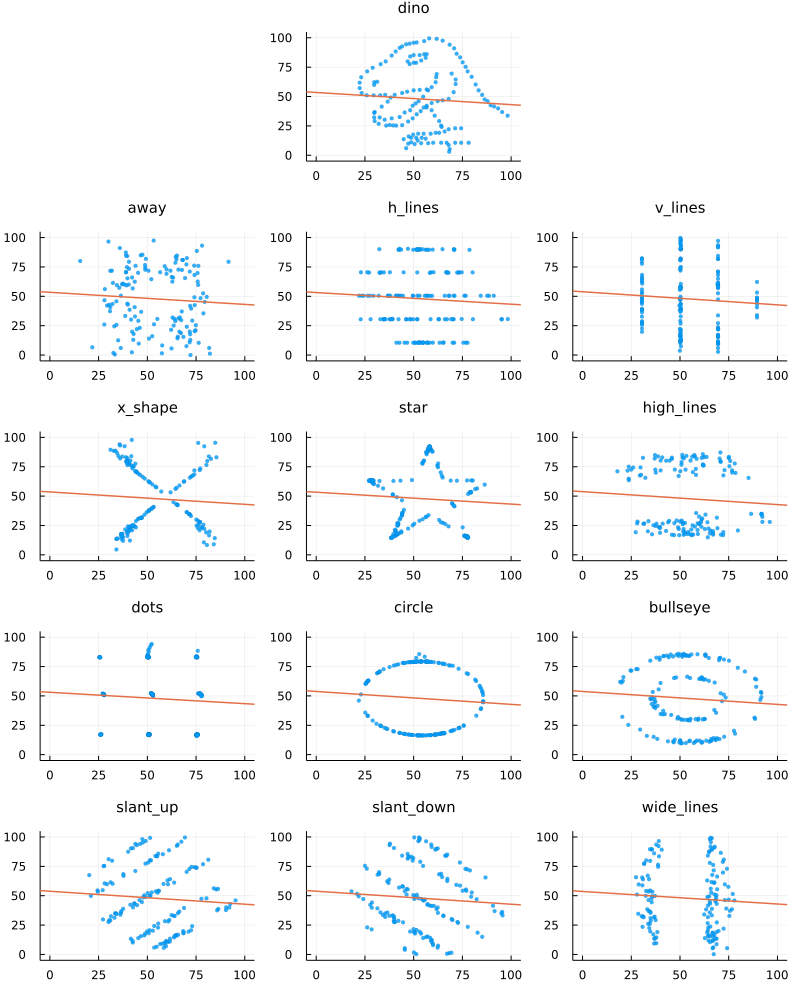

In [8]:
Datasaurus_dozen

以上の13個のデータの標本平均 $\xbar$, $\ybar$ と不偏分散 $s_x^2$, $s_y^2$ と不偏共分散 $s_{xy}$ はほぼ一致し, その結果, 回帰直線 $y = \hat\alpha + \hat\beta x$ もほぼ一致する.

以上のデータの中に最小二乗法によって回帰直線を求めることが適切な場合はない.

左下の "slant_up" のデータでは, 斜めに並んでいる5つのグループごとに傾きは正になっているが, 回帰直線の傾きは負になっている.

このような場合が生じることを俗に __Simpson's paradox__ と言うことがある.

私が読んだ範囲内での __Simpsonのパラドックス__ の「正しい理解の仕方」に関する最良の解説は次のブログ記事である:

* KRSK, [データ分析の不思議、シンプソンのパラドックスを統計的因果推論から考える](https://www.krsk-phs.com/entry/simpsonparadox), 2018-08-31

### 問題: データサウルス

[「条件付き確率分布, 尤度, 推定, 記述統計」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/06%20Conditional%20distribution%2C%20likelihood%2C%20estimation%2C%20and%20summary.ipynb) の最後の方にあるDataSaurusの例に関する問題をまだ解いていない人は解いてみよ.

### 箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること

以下の図は既出のデータサウルスの解説ページ

* https://www.autodesk.com/research/publications/same-stats-different-graphs

の最後の方にある動画のスクリーンショットとして取得したものである.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/histogram-raw-box.png" width=95%>

上段がヒストグラムで中断がなまデータの様子で下段が箱ひげ図(box plot)である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/raw-box-violin.png" width=80%>

左側がなまデータ(raw data)の様子であり, 真ん中と右側はそれぞれそれに対応する箱ひげ図(box plot)とバイオリンプロット(violin plot)である.

以上の図から, なまデータの様子を見ておくことが必須であることがわかる.

どの場合にも, なまデータの様子が全然違うのに, 箱ひげ図の様子はどれもほぼ同じになってしまっている. 

__箱ひげ図は十分な大きさのサイズを持つ単峰型のデータの場合にのみ適切なグラフの描き方である.__

__さらに, 箱ひげ図に限らず, グラフのもとになったデータのサイズを必ず示しておくべきである.__

「単峰型」とは「山が1つの」という意味である.

右側のバイオリン・プロットは箱ひげ図よりもずっとましだが, なまデータの様子を誤解なく伝えるだけの力はないように見える.

ヒストグラムはなまデータの様子を伝えるためには箱ひげ図やバイオリンプロットよりも適切な方法に成り得るが, 横軸を区切る幅(ビン, bin)の設定に恣意性があり, ビンの恣意性によって誤解を招くグラフを作ってしまう危険性がある.

データの様子をグラフで確認する場合にも, グラフの描き方によって誤解が生じる場合が出て来てしまうことを知っておく必要がある.

### 不適切な箱ひげ図の例

上で紹介した例はサイズは十分に大きいが単峰型でないデータで箱ひげ図を描いた場合(非適切な場合)の例になっている.  サイズが小さ過ぎるデータの箱ひげ図を描いた場合(不適切な場合)の例が

* 藤井良宜, 中学校数学におけるこれからの統計教育, 特集統計教育はどう変わるかII, Rimse (), 理数教育研究所, 2018年10月20日発行, pp.2-6.  https://rimse.or.jp/report/pdf/Rimse23.pdf

のpp.2-6にある. 以下の図はこの文献からの引用である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-1.png" width=300>

これがなまデータである.  データサイズが小さくて, しかも $5$ に山がもう1つある可能性もあり, 自信を持って単峰型のデータとは言い難い.  しかし, 上の文献ではこのデータに箱ひげ図を適用することを教えるべきだとしている.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-2.png" width=300>

この箱ひげ図による要約によってなまデータの様子を誤解なく伝えられるはずがない.

* この箱ひげ図には重要な情報である標本サイズが記されていない.
* この箱ひげ図を見ても, 7,8,9冊の子が0人であることは分からない.

さらに次のような図も見つかる.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-3.png" width=500>

このように, ほんの数個の数値からなるデータをこのように箱ひげ図で「要約」することは不適切な行為である.

この不適切なグラフの描き方を見れば, データサイズの情報が非常に重要なことも分かる.

### 箱ひげ図などの正しい使い方

以下の表は

* https://twitter.com/T_Weissgerber/status/1087646465374281728

からの引用である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/TraceyWeissgerber.jpg" width=95%>

例えば, box plot (箱ひげ図)については,

* サンプルサイズが大きい場合に使用
* 単峰型でないデータには使用しない

ということになっており, ベストプラクティス(最良実践)の項目には

* x軸上のグループ名の下にサンプルのサイズも示しておくこと
* ひげが何を表しているかを凡例で示しておくこと

と書いてある.

### ゴリラ

以下の例はこの一連のノート群の中では初めて紹介するものである.  その例は論文

* Itai Yanai & Martin Lercher, [A hypothesis is a liability](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w), Genome Biology volume 21, Article number: 231 (2020)

で使われた擬似データセットである. 以下で使う図はこの論文からの引用になっている.

論文の著者たちは, 学生達に以下のように伝えた:

>データセットには, 1786人のボディマス指数(BMI)とある特定の日にそれぞれが歩いた歩数(steps)が, 男性用と女性用の2つのファイルに含まれている.

学生に私たデータセットの様子は以下の通り:

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_a.png" width=300></a>

そして, 学生を次の2つのグループに分けた.

1つ目の「仮説あり」の(hypthothesis-focusedの)グループの学生は, 以下の3つの仮説を検討するように求めた

(i) 男性と女性の平均歩数に統計的に有意な差があること
(ii) 女性では歩数とBMIの間には負の相関があること
(iii) 男性では歩数とBMIの間には正の相関があること

さらに, データセットから結論できることが他にあるかどうかも質問した.

2つ目の「仮説なし」の(hypothesis-freeの)グループの学生には単に「データセットから何を結論付けますか?」と聞いた.

その結果は以下の通り.

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_c.png" width=400></a>

この表を翻訳すると以下の通り:

$$
\begin{array}{|c|c|c|}
\hline
& \text{ゴリラは発見されなかった} & \text{ゴリラが発見された} \\
\hline
\text{仮説ありグループ} & 14 & 5 \\
\hline
\text{仮説なしグループ} &  5 & 9 \\
\hline
\end{array}
$$

「ゴリラは発見されなかった」と「ゴリラが発見された」とは一体どういう意味なのだろうか?

その理由はデータの散布図を描くとわかる!

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_b.png" width=500></a>

学生に課された統計学のレポート課題のデータセットは実は偽物のデータセットであり, 散布図を描くとゴリラの絵が現れるように作られていたのである!

レポートを提出した学生は2つのグループを合わせて33人で, そのうちの過半数の19人がゴリラを発見できなかった.

さらに, (i),(ii),(iii)の3つの仮説を検討するように指示を出された「仮説あり」のグループでは19人中14人もゴリラを発見できなかった! 3つの仮説の検討の指示によって誤誘導されてしまった格好になってしまっている.

このようなレポート課題を出すことは統計学の講義として教育的であり, 学生の側も良い勉強になったと思われる.

### 問題: ゴリラ

[「検定と信頼区間: 比率の比較」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb) の必修計算問題の節の解答例を参照して, 2×2の分割表

$$
\begin{array}{|c|c|c|}
\hline
& \text{ゴリラを発見できず} & \text{ゴリラを発見した} \\
\hline
\text{仮説ありグループ} & 14 & 5 \\
\hline
\text{仮説なしグループ} &  5 & 9 \\
\hline
\end{array}
$$

のデータから「仮説あり」と「仮説なし」の2つのグループでゴリラを発見できない確率(比率)の違いに関ついて以下を求めよ:

1. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のWald版P値.
2. オッズ比パラメータ $\OR$ に関するWald版 $95\%$ 信頼区間.

可能ならば以下も求めよ.

3. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のPearsonのχ²検定版P値.
4. オッズ比パラメータ $\OR$ に関するPearsonのχ²検定版の $95\%$ 信頼区間.
5. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のSterne版Fisher検定のP値.
6. オッズ比パラメータ $\OR$ に関するSterne版Fisher検定の $95\%$ 信頼区間.
7. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のClopper-Pearson版Fisher検定のP値.
8. オッズ比パラメータ $\OR$ に関するClopper-Pearson版Fisher検定の $95\%$ 信頼区間.

可能ならばそれぞれの場合のP値函数のグラフをプロットしてみよ.

無理して3から8の小問を解いたり, P値函数のグラフを描いたりする必要はないが, もしもそれらの答えを数値的に求めたり, グラフを描く方法をマスターできたりしたら, 後で役に立つ可能性がある.

これらの問題の解答例はここには書かない.

## 印象操作のためにグラフを利用しない

統計学云々以前の問題として, 印象操作のためにグラフを悪用することはやめた方がよい.

多くの場合に誤った印象を与えることになることで有名なグラフの描き方に3次元円グラフがある. (一般に円グラフはよくないグラフの描き方だとされている.)

### 3次元円グラフは絶対に避ける

3次元グラフがダメな理由および円グラフ一般が良いグラフの描き方ではないことについては

* [3D円グラフ撲滅委員会より、なぜ3D円グラフを使ってはいけないか](https://www.cresco.co.jp/blog/entry/950/)

が見易く読み易い. 以下の図はこのページからの引用である. ただし, 矢線は筆者が追加した.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/ADV18_01.jpg" width=469>

__問題:__ 隣り合っている20代と30代ではどちらの割合が大きいか?

見た目的には圧倒的に30代の割合の方が大きく見えるが, 実際には20代が20%で30代は18%であり, 30代の割合の方が少し小さい.  手前の40代の方が奥側の10代や70代よりも割合が大きく見えるが, 実際にはそうではない.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/ADV18_02.jpg" width=471>

このように3次元円グラフは割合について間違った印象を与えるために利用できる!

## 無作為抽出の失敗に注意を払う

### 1936年のアメリカ大統領選挙の結果の予想の失敗

### 1948年のアメリカ大統領選挙の結果の予想の失敗

## 統計モデルと調査実験観察の不整合性を無くす

### 多段階検定は避ける

### モデルが不適切なせいでP値の値が歪むことがある

## 交絡の問題に注意する

## 統計学用語の「誤用」には寛容であるべき

### 標本数

### 母数

## 概念そのものの誤解には厳しくあるべき

### P値

### 信頼区間と検定の表裏一体性